<a href="https://colab.research.google.com/github/sidra3921/stock-price-forecasting-sidra2225165138/blob/main/Week10_Apply_specialized_AI_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📅 Week 10:  Apply specialized AI model. Semester: BSSE 7th Name: Sidra Roll No 2225165138 Project: Stock Price Forecasting (Apple Dataset) Course: Applied Data Science with AI

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout



In [6]:
from google.colab import files
import io

# Upload the file
uploaded = files.upload()

# Assuming the user uploads the 'AAPL.csv' file or a similar single CSV
# We iterate through the uploaded files dictionary
for fn in uploaded.keys():
    print(f'User uploaded file "{fn}"')
    # Read the file directly into a pandas DataFrame
    df = pd.read_csv(io.BytesIO(uploaded[fn]))
    break # Assuming only one file is intended, or take the first one

df.head()

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json"


,"{""username"":""sidra3921""","key:""f4d8307c016487c2cba5d1afab7c0df5""}"


In [8]:
!pip install kaggle


In [9]:
from google.colab import files
files.upload()   # upload kaggle.json


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sidra3921","key":"f4d8307c016487c2cba5d1afab7c0df5"}'}

In [10]:
import os, shutil, glob

os.makedirs("/root/.kaggle", exist_ok=True)

for file in glob.glob("kaggle*.json"):
    shutil.move(file, "/root/.kaggle/kaggle.json")

os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("Kaggle setup completed successfully")


Kaggle setup completed successfully


In [11]:
!kaggle datasets download -d yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025
!unzip -o 10-year-daily-stock-data-of-apple-2015-to-2025.zip


Dataset URL: https://www.kaggle.com/datasets/yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025
License(s): apache-2.0
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 313MB/s]
Archive:  10-year-daily-stock-data-of-apple-2015-to-2025.zip
  inflating: apple_stock_10years_daywise.xlsx  


In [12]:
import pandas as pd

df = pd.read_excel("apple_stock_10years_daywise.xlsx")
df.head()


,Date,Close,High,Low,Open,Volume
0,2015-04-13,28.33,28.71,28.28,28.67,145460400
1,2015-04-14,28.21,28.43,28.12,28.36,102098400
2,2015-04-15,28.31,28.39,28.14,28.23,115881600
3,2015-04-16,28.18,28.38,28.16,28.20,113476000
4,2015-04-17,27.86,28.17,27.80,28.04,207828000


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   High    2517 non-null   float64       
 3   Low     2517 non-null   float64       
 4   Open    2517 non-null   float64       
 5   Volume  2517 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


/tmp/ipython-input-1645131684.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [14]:
data = df[['Close']]


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [16]:
import numpy as np

def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)


In [17]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [19]:
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

lstm_model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

lstm_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

lstm_model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

lstm_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0237 - val_loss: 0.0016
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 3.3478e-04 - val_loss: 0.0013
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.7131e-04 - val_loss: 0.0013
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 2.7215e-04 - val_loss: 0.0011
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.6874e-04 - val_loss: 0.0013
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 2.9143e-04 - val_loss: 9.3049e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.0020e-04 - val_loss: 0.0018
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 2.3082e-04 - val_loss: 0.0012
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.1741e-04 - val_loss: 0.0017
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.0603e-04 - val_loss: 0.0015


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step


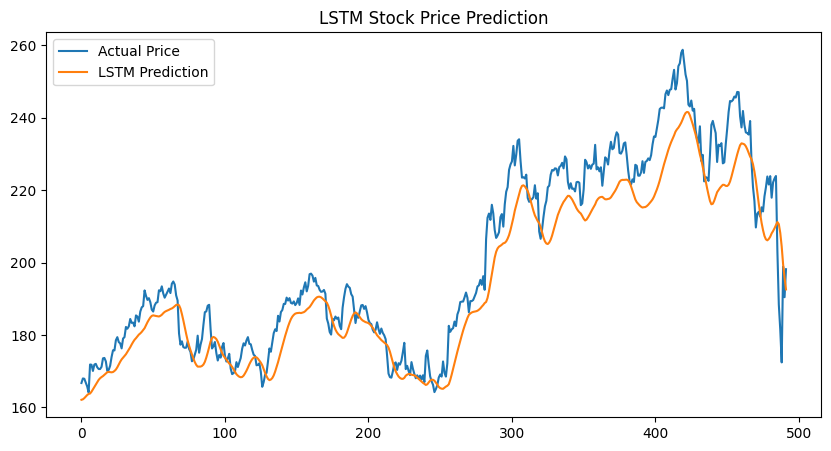

In [22]:
import matplotlib.pyplot as plt

lstm_pred = lstm_model.predict(X_test)

lstm_pred = scaler.inverse_transform(lstm_pred)
y_test_actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(lstm_pred, label='LSTM Prediction')
plt.legend()
plt.title('LSTM Stock Price Prediction')
plt.show()


In [23]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten


In [24]:
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu',
           input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

cnn_model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 58, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 29, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1856)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        92,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,157 (363.89 KB)

 Trainable params: 93,157 (363.89 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
cnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0179 - val_loss: 0.0036
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1107e-04 - val_loss: 0.0018
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1501e-04 - val_loss: 0.0018
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4577e-04 - val_loss: 0.0013
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7206e-04 - val_loss: 0.0022
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2361e-04 - val_loss: 0.0042
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.9513e-04 - val_loss: 0.0022
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5433e-04 - val_loss: 0.0011
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8661e-04 - val_loss: 0.0022
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3274e-04 - val_loss: 8.2645e-04


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


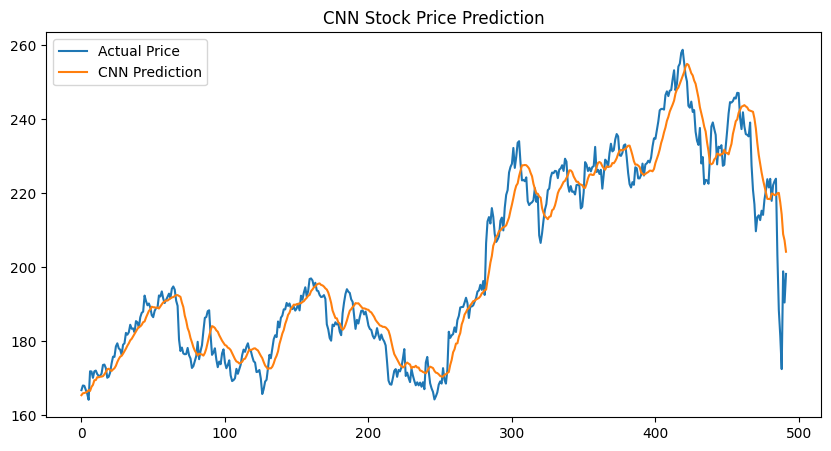

In [26]:
cnn_pred = cnn_model.predict(X_test)
cnn_pred = scaler.inverse_transform(cnn_pred)

plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(cnn_pred, label='CNN Prediction')
plt.legend()
plt.title('CNN Stock Price Prediction')
plt.show()


In [27]:
comparison = pd.DataFrame({
    'Model': ['LSTM', 'CNN'],
    'Description': [
        'Captures long-term dependencies in stock prices',
        'Extracts short-term temporal patterns'
    ]
})

comparison


,Model,Description
0,LSTM,Captures long-term dependencies in stock prices
1,CNN,Extracts short-term temporal patterns
